# Data Project: Refugees and Unemployment

This project seeks to determine, whether there is a relationship between unemployment and number of refugees within a number of relevant countries in the period 2013 - 2017. The analysis conducted will only be graphical. 

In the first part of the project we look at different patterns over the years and countries, to determine which countries and period that are most interesting to look at and where the refugees within these countries come from. 

In the second part of the project, we compare unemployment rates and number of refugees wihtin the selected countries for the relevant period.

First we import the relevant libraries:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pandas_datareader import wb 

## Downloading and cleaning of relevant data

The data for refugee population wihtin the relevant countries is downloaded from the World Bank data base:

In [2]:
# Download data on refugee population in a country from the World Bank database
refugeesin_wb = wb.download(indicator='SM.POP.REFG', country = 'all', start=1990, end=2017)
refugeesin_wb = refugeesin_wb.reset_index()

# Show data
refugeesin_wb.head(3)

,country,year,SM.POP.REFG
0,Arab World,2017,9056647.0
1,Arab World,2016,8440191.0
2,Arab World,2015,8304742.0


In [3]:
# Clean data (deleting regions, keeping countries)
refugeesin_wb.loc[refugeesin_wb.country == 'Afghanistan']
refugeesin_wb = refugeesin_wb.iloc[1316:,]
refugeesin_wb = refugeesin_wb.reset_index()
refugeesin_wb = refugeesin_wb.drop('index', axis = 1)
refugeesin_wb.head(3)

,country,year,SM.POP.REFG
0,Afghanistan,2017,75927.0
1,Afghanistan,2016,59771.0
2,Afghanistan,2015,257554.0


In [4]:
# Check unique countries to compare with other data set
len(refugeesin_wb.country.unique())

217

In [5]:
# Rename columns, check final data set
refugeesin_wb = refugeesin_wb.rename(columns = {'country':'Country','year':'Year','SM.POP.REFG':'Refugee population in country'})
refugeesin_wb.head(3)

,Country,Year,Refugee population in country
0,Afghanistan,2017,75927.0
1,Afghanistan,2016,59771.0
2,Afghanistan,2015,257554.0


In [6]:
# Download data on refugee population by country of origin from the World Bank database
refugeesout_wb = wb.download(indicator='SM.POP.REFG.OR', country = 'all', start=1990, end=2017)
refugeesout_wb = refugeesout_wb.reset_index()

In [7]:
# Clean data (deleting regions, keeping countries)
refugeesout_wb.loc[refugeesout_wb.country == 'Afghanistan']
refugeesout_wb = refugeesout_wb.iloc[1316:,]
refugeesout_wb = refugeesout_wb.reset_index()
refugeesout_wb = refugeesout_wb.drop('index', axis = 1)

In [8]:
# Check unique countries to compare with other data set
len(refugeesout_wb.country.unique())

217

In [9]:
# Rename columns, check final data set
refugeesout_wb = refugeesout_wb.rename(columns = {'country':'Country','year':'Year','SM.POP.REFG.OR':'Refugee population outside of country'})
refugeesout_wb.head(3)

,Country,Year,Refugee population outside of country
0,Afghanistan,2017,2624225.0
1,Afghanistan,2016,2501445.0
2,Afghanistan,2015,2666305.0


### Combining the two imported data sets

In [10]:
# Join the datasets
refugees_wb = pd.merge(refugeesin_wb,refugeesout_wb,how='outer',on=['Country','Year'])
refugees_wb.head(3)

,Country,Year,Refugee population in country,Refugee population outside of country
0,Afghanistan,2017,75927.0,2624225.0
1,Afghanistan,2016,59771.0,2501445.0
2,Afghanistan,2015,257554.0,2666305.0


In [11]:
# Change data type of 'Year' to integer
refugees_wb['Year'] = refugees_wb['Year'].astype(int)
refugees_wb.dtypes

Country                                   object
Year                                       int64
Refugee population in country            float64
Refugee population outside of country    float64
dtype: object

### Calculation of net refugee population

In [12]:
# Calculate net refugee population
refugees_wb['Net refugee population'] = refugees_wb['Refugee population in country']-refugees_wb['Refugee population outside of country']
refugees_wb.head(3)

,Country,Year,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,2017,75927.0,2624225.0,-2548298.0
1,Afghanistan,2016,59771.0,2501445.0,-2441674.0
2,Afghanistan,2015,257554.0,2666305.0,-2408751.0


## Visual Analysis

In [13]:
# Import libraries used for graphics
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
import ipywidgets as widgets

In [14]:
# Show net refugee population over the years with country dropdown menu
def interactive_development(refugees_wb, Country):
    
    # a. Calculations
    I = refugees_wb['Country'] == Country
    
    # b. Plot
    ax=refugees_wb.loc[I,:].plot.bar(x='Year', y='Net refugee population', style='-o', legend=None, color=(0.2, 0.4, 0.6, 0.6)) 
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.gca().invert_xaxis()
    ax.set_title("Net Refugee Population by Country")
    ax.set_ylabel("Net Refugee Population")

# Make it interactive
widgets.interact(interactive_development, 
    refugees_wb = widgets.fixed(refugees_wb),
    Country = widgets.Dropdown(description='Country', options=refugees_wb.Country.unique(), value='Afghanistan')
)

interactive(children=(Dropdown(description='Country', options=('Afghanistan', 'Albania', 'Algeria', 'American …

<function __main__.interactive_development(refugees_wb, Country)>

Looking at different countries, we see different patterns. Looking at **European countries**, e.g. **Germany**, we see a large net refugee population in the 1990's, probably due to the breakdown of Yugoslavia, followed by a decreasing net refugee population in the 2000's when the situation stabilized in that area, and then an increasing net refugee population again following the war in Syria and especially after the refugee crisis in 2015. Looking at e.g. **Bosnia and Hercegovina**, we see the opposite side of this story with a very negative net refugee population in the 1990's and a net refugee population of around 0 today. Looking at **Middle Eastern countries**, e.g. **Jordan**, we see that over the entire period there has been a positive net refugee population, but it was not large during the 1990's. However, it has grown steadily up until 2017, especially due to the war in Syria. Looking at **Syria** gives us the opposite side of this story with a net refugee population of around 0 up until 2005 followed by a period with a small positive net refugee population and then in 2011 onwards - the war years - a significantly negative net refugee population.

**We will focus on the most recent refugee crisis following espcecially the Syrian war and will thus restrict our data set to the years 2013-2017.**

In [15]:
# Restrict data set to years 2013-2017
refugees_wb = refugees_wb[refugees_wb['Year'] > 2012]
refugees_wb.head(10)

,Country,Year,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,2017,75927.0,2624225.0,-2548298.0
1,Afghanistan,2016,59771.0,2501445.0,-2441674.0
2,Afghanistan,2015,257554.0,2666305.0,-2408751.0
3,Afghanistan,2014,300423.0,2596270.0,-2295847.0
4,Afghanistan,2013,16863.0,2556502.0,-2539639.0
28,Albania,2017,89.0,12163.0,-12074.0
29,Albania,2016,138.0,11065.0,-10927.0
30,Albania,2015,104.0,10408.0,-10304.0
31,Albania,2014,104.0,10158.0,-10054.0
32,Albania,2013,93.0,10103.0,-10010.0


In [16]:
# Group by country and summarize over all years
refugees_grouped = refugees_wb.drop('Year', axis=1)
refugees_grouped = refugees_grouped.groupby('Country').mean()
refugees_grouped = refugees_grouped.reset_index()
refugees_grouped.head(3)

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
0,Afghanistan,142107.6,2588949.4,-2446841.8
1,Albania,105.6,10779.4,-10673.8
2,Algeria,94187.0,3678.2,90508.8


In [17]:
# Show bottom 10 net refugee population countries
ascending_NRP = refugees_grouped.sort_values('Net refugee population')
ascending_NRP.head(10)

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
189,Syrian Arab Republic,611602.6,4612412.4,-4000809.8
0,Afghanistan,142107.6,2588949.4,-2446841.8
176,Somalia,7872.8,1070007.8,-1062135.0
178,South Sudan,257343.0,1077197.2,-819854.2
37,Central African Republic,10296.8,434480.6,-424183.8
61,Eritrea,2669.4,404875.2,-402205.8
42,Colombia,232.2,319962.2,-319730.0
185,Sudan,415076.0,657428.4,-242352.4
44,"Congo, Dem. Rep.",321048.2,543215.6,-222167.4
31,Burundi,54322.2,257053.8,-202731.6


Over the past five years, **Syria** has had the most negative net refugee population, which is not surprising due to the civil war. **Afghanistan** comes in second which is probably due to the general instability in the country over many years.

In [18]:
# Show top 10 of net refugee population countries
descending_NRP = refugees_grouped.sort_values('Net refugee population', ascending=False)
descending_NRP.head(10)

,Country,Refugee population in country,Refugee population outside of country,Net refugee population
99,Jordan,2809918.2,1844.6,2808073.6
198,Turkey,2217679.0,61857.6,2155821.4
213,West Bank and Gaza,2104365.8,97731.0,2006634.8
110,Lebanon,1476915.2,4497.6,1472417.6
149,Pakistan,1485777.2,183372.0,1302405.2
91,"Iran, Islamic Rep.",955537.6,90980.0,864557.6
202,Uganda,674917.0,6857.0,668060.0
64,Ethiopia,702114.8,84237.0,617877.8
101,Kenya,504636.2,8025.4,496610.8
73,Germany,472087.8,130.4,471957.4


We see that over the past five years, **Jordan** has the largest net refugee population followed by **Turkey**. Further down the list we have some African countries like **Uganda** that also has a large net refugee popilation due to the the instability in especially South Sudan and DR Congo. **Germany** is the European country with the largest net refugee population.

We now know that **Jordan** and **Turkey** had the largest net refugee population averaging over the years 2013-2017. **Uganda** is the highest ranked African country, while **Germany** is the highest ranked European country.

Thus, we will continue with those four and **Denmark**.

In [19]:
# Create country filter
country_filter = refugees_wb.Country.isin(['Germany', 'Denmark', 'Uganda', 'Jordan', 'Turkey'])
refugees = refugees_wb[country_filter].set_index('Year')

Text(0.5, 1.0, 'Net refugee population per Country')

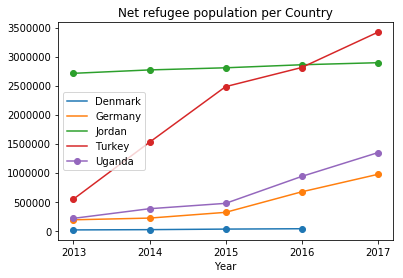

In [20]:
# Create graphic overview of net refugee population in chosen countries
fix,ax = plt.subplots()
plt.xticks(np.arange(2013, 2018, step=1.0))
ax = refugees.groupby('Country')['Net refugee population'].plot(style='-o', legend='False')
plt.title('Net refugee population per Country')

We see that the five countries have had quite different trends over the time period we are looking at. **Jordan** has had a high and stable net refugee population, while **Turkey** started quite low but ends the period with a larger net refugee population than Jordan. **Uganda** and **Germany** have similar trends, but probably refugees of different origin, which we will look into later. **Denmark** has a net refugee population that is very small compared to the other countries.

### Where do the refugees come from?

We would like to examine the origin of the refugees in the population in the countries of interest. However, instead of looking at the entire refugee population in the countries, we will look at the origin of the asylum seekers that arrived in 2013-2017, i.e. **the inflow**. Due to a lack of data on Jordan and Uganda, we have to leave them out of this part.

In [21]:
# Import libraries
import os

In [22]:
# Find name of relevant data file
os.listdir('./dataproject/')

['Refugees.csv', '__init__.py', 'example.py']

In [23]:
# Load data on refugee origin
asylum = pd.read_csv("./dataproject/Refugees.csv", low_memory=False, skiprows = 3, skipinitialspace=True)
asylum.head(3)

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Albania,Afghanistan,2015,May,3
1,Albania,Afghanistan,2016,June,18
2,Albania,Afghanistan,2016,July,19


In [24]:
# Rename columns
asylum.rename(columns = {'Country / territory of asylum/residence': 'Country', 'Value': 'Asylum Seekers'}, inplace=True)
asylum.head()

,Country,Origin,Year,Month,Asylum Seekers
0,Albania,Afghanistan,2015,May,3
1,Albania,Afghanistan,2016,June,18
2,Albania,Afghanistan,2016,July,19
3,Albania,Afghanistan,2016,November,27
4,Albania,Afghanistan,2017,January,21


### Germany

In [25]:
# Restrict data to Germany
country_filter = asylum.Country.isin(['Germany'])
Germany=asylum[country_filter]

In [26]:
# Ignore error on chained assignment
pd.set_option('chained_assignment',None)

# Remove all non-numeric values from "Value" column
Germany.loc[:,'Asylum Seekers'] = pd.to_numeric(Germany['Asylum Seekers'], errors='coerce')

In [27]:
# Drop all rows with null values 
Germany = Germany.dropna(subset=['Asylum Seekers'])

In [28]:
# Group data by year
Germany_grouped = Germany.drop(['Year','Month'], axis=1)
Germany_grouped = Germany_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Germany_grouped = Germany.groupby(['Origin'])['Asylum Seekers'].sum()
Germany_grouped = Germany.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})

In [29]:
# Sort data and rename columns
Germanysorted = Germany_grouped.sort_values('Asylum Seekers', ascending=False)
Germanysorted.rename(columns = {'Origin':'Origin of Asylum Seekers in Germany'}, inplace=True)

In [30]:
# Present data
Germanysorted.head(3)

,Origin of Asylum Seekers in Germany,Asylum Seekers
136,Syrian Arab Rep.,516916.0
0,Afghanistan,190030.0
67,Iraq,154643.0


We see that by far most of the asylum seekers in Germany during 2013-2017 are from Syria, which is not surprising due to the war. Afghanistan comes in second, closely followed by Iraq, both countries known for their unstable situation.

### Denmark

In [31]:
# Restrict data to Denmark
country_filter = asylum.Country.isin(['Denmark'])
Denmark=asylum[country_filter]

# Remove all non-numeric values from "Value" column
Denmark['Asylum Seekers'] = pd.to_numeric(Denmark['Asylum Seekers'], errors='coerce')

# Drop all rows with null values 
Denmark = Denmark.dropna(subset=['Asylum Seekers'])

# Group data
Denmark_grouped = Denmark.drop(['Year','Month'], axis=1)
Denmark_grouped = Denmark_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Denmark_grouped = Denmark.groupby(['Origin'])['Asylum Seekers'].sum()
Denmark_grouped = Denmark.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})

# Sort data and rename columns
Denmarksorted = Denmark_grouped.sort_values('Asylum Seekers', ascending=False)
Denmarksorted.rename(columns = {'Origin':'Origin of Asylum Seekers in Denmark'}, inplace=True)

# Present data
Denmarksorted.head(3)

,Origin of Asylum Seekers in Denmark,Asylum Seekers
113,Syrian Arab Rep.,19606.0
37,Eritrea,4751.0
0,Afghanistan,4344.0


As with Germany, most asylum seekers in Denmark in 2013-2017 are from Syria. Second is Eritrea, which at first glance seems a bit surprising. However, the asylum seekers from Eritrea has had quite a bit of attention in the Danish media, both because the inflow started kind of out of the blue in 2014 and then - again kind of out of the blue - slowed down in 2016, and also because of a quite controversial report from the Danish Ministry of Immigration and Integration stating that Eritrea was a completely safe country to return to. Afghanistan is third with the amount of asylum seekers very close to that of Eritrea.

### Turkey

In [32]:
# Restrict data to Turkey
country_filter = asylum.Country.isin(['Turkey'])
Turkey=asylum[country_filter]

# Remove all non-numeric values from "Value" column
Turkey['Asylum Seekers'] = pd.to_numeric(Turkey['Asylum Seekers'], errors='coerce')

# Drop all rows with null values 
Turkey = Turkey.dropna(subset=['Asylum Seekers'])

# Group data
Turkey_grouped = Turkey.drop(['Year','Month'], axis=1)
Turkey_grouped = Turkey_grouped.groupby(['Country', 'Origin', 'Asylum Seekers']).sum()
Turkey_grouped = Turkey.groupby(['Origin'])['Asylum Seekers'].sum()
Turkey_grouped = Turkey.groupby(['Origin'], as_index=False).agg({'Asylum Seekers':'sum'})

# Sort data and rename columns
Turkeysorted = Turkey_grouped.sort_values('Asylum Seekers', ascending=False)
Turkeysorted.rename(columns = {'Origin':'Origin of Asylum Seekers in Turkey'}, inplace=True)

# Present data
Turkeysorted.head(3)

,Origin of Asylum Seekers in Turkey,Asylum Seekers
36,Iraq,204312.0
0,Afghanistan,188798.0
35,Iran (Islamic Rep. of),45806.0


Quite surprisingly, since Syria borders Turkey, Syrian asylum seekers are not in the top 3 for Turkey. However, this does seem to be a data problem, as there is no 2017 data for Syrian asylum seekers in Turkey, and the data on Syrian asylum seekers for Turkey in general seems to be a bit flawed. However, that Iraq, Afghanistan and Iran are in the top is not surprising. In general, Turkey is a major refugee hosting country.

We can conclude that - except for the Eritrean asylum seekers in Denmark - the countries of origin are more or less the same for the three countries.

## So how are the countries with a large refugee population doing on unemployment?

In [33]:
# Import unemployment data from the World Bank (% of labor force)
unemploy_wb = wb.download(indicator='SL.UEM.TOTL.ZS', country=['DK','DE','UG','JO','TR'], start=2013, end=2017)
unemploy_wb = unemploy_wb.reset_index()
unemploy_wb.head()

,country,year,SL.UEM.TOTL.ZS
0,Germany,2017,3.746
1,Germany,2016,4.122
2,Germany,2015,4.624
3,Germany,2014,4.981
4,Germany,2013,5.231


In [34]:
# Clean data (change column names, change 'Year' data type)
unemploy_wb = unemploy_wb.rename(columns = {'country':'Country','year':'Year','SL.UEM.TOTL.ZS':'Unemployment rate'})
unemploy_wb['Year'] = unemploy_wb['Year'].astype(int)
unemploy_wb = unemploy_wb.set_index('Year')
unemploy_wb.head()

,Country,Unemployment rate
Year,,
2017,Germany,3.746
2016,Germany,4.122
2015,Germany,4.624
2014,Germany,4.981
2013,Germany,5.231


Text(0.5, 1.0, 'Unemployment rate per Country')

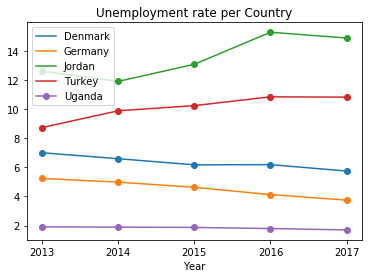

In [35]:
# Plot unemployment rate of selected countries
ax = unemploy_wb.groupby('Country')['Unemployment rate'].plot(style='-o', legend=True)
plt.xticks(np.arange(2013, 2018, step=1.0))
plt.title('Unemployment rate per Country')

### Germany

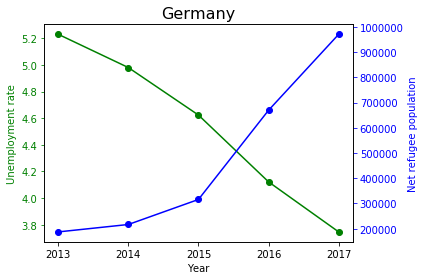

In [36]:
# Plot trend of unemployment and net refugee population for Germany
country_filter = unemploy_wb.Country.isin(['Germany'])
Denmark=unemploy_wb[country_filter]

country_filter2 = refugees.Country.isin(['Germany'])
Denmark2=refugees[country_filter2]

fig, ax1 = plt.subplots()

plt.title('Germany', fontsize=16)

plt.xticks(np.arange(2013, 2018, step=1.0))
s1 = Denmark['Unemployment rate']
ax1.plot(s1, '-o', color='green')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Unemployment rate', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
s2 = Denmark2['Net refugee population']
ax2.plot(s2, '-o', color='blue')
ax2.set_ylabel('Net refugee population', color='blue')
ax2.tick_params('y', colors='blue')

fig.tight_layout()
plt.show()

### Denmark

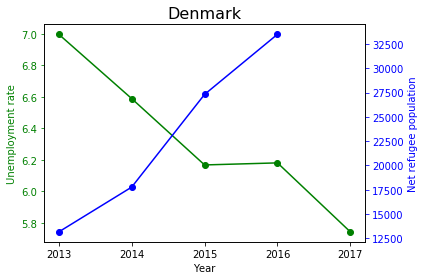

In [37]:
# Plot trend of unemployment and net refugee population for Denmark
country_filter = unemploy_wb.Country.isin(['Denmark'])
Denmark=unemploy_wb[country_filter]

country_filter2 = refugees.Country.isin(['Denmark'])
Denmark2=refugees[country_filter2]

fig, ax1 = plt.subplots()

plt.title('Denmark', fontsize=16)

plt.xticks(np.arange(2013, 2018, step=1.0))
s1 = Denmark['Unemployment rate']
ax1.plot(s1, '-o', color='green')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Unemployment rate', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
s2 = Denmark2['Net refugee population']
ax2.plot(s2, '-o', color='blue')
ax2.set_ylabel('Net refugee population', color='blue')
ax2.tick_params('y', colors='blue')

fig.tight_layout()
plt.show()

### Turkey

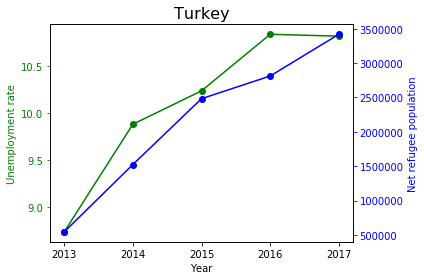

In [38]:
# Plot trend of unemployment and net refugee population for Turkey
country_filter = unemploy_wb.Country.isin(['Turkey'])
Denmark=unemploy_wb[country_filter]

country_filter2 = refugees.Country.isin(['Turkey'])
Denmark2=refugees[country_filter2]

fig, ax1 = plt.subplots()

plt.title('Turkey', fontsize=16)

plt.xticks(np.arange(2013, 2018, step=1.0))
s1 = Denmark['Unemployment rate']
ax1.plot(s1, '-o', color='green')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Unemployment rate', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
s2 = Denmark2['Net refugee population']
ax2.plot(s2, '-o', color='blue')
ax2.set_ylabel('Net refugee population', color='blue')
ax2.tick_params('y', colors='blue')

fig.tight_layout()
plt.show()

### Jordan

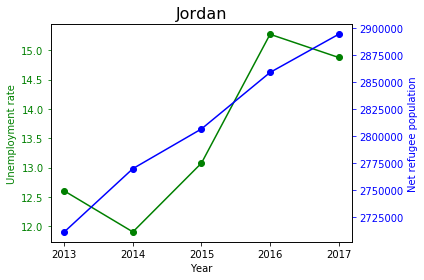

In [39]:
# Plot trend of unemployment and net refugee population for Jordan
country_filter = unemploy_wb.Country.isin(['Jordan'])
Denmark=unemploy_wb[country_filter]

country_filter2 = refugees.Country.isin(['Jordan'])
Denmark2=refugees[country_filter2]

fig, ax1 = plt.subplots()

plt.title('Jordan', fontsize=16)

plt.xticks(np.arange(2013, 2018, step=1.0))
s1 = Denmark['Unemployment rate']
ax1.plot(s1, '-o', color='green')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Unemployment rate', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
s2 = Denmark2['Net refugee population']
ax2.plot(s2, '-o', color='blue')
ax2.set_ylabel('Net refugee population', color='blue')
ax2.tick_params('y', colors='blue')

fig.tight_layout()
plt.show()

### Uganda

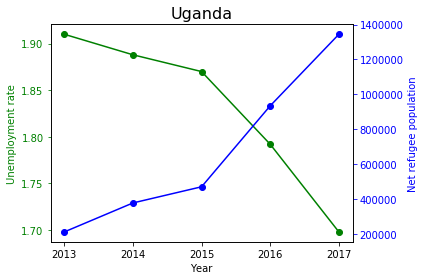

In [40]:
# Plot trend of unemployment and net refugee population for Uganda
country_filter = unemploy_wb.Country.isin(['Uganda'])
Denmark=unemploy_wb[country_filter]

country_filter2 = refugees.Country.isin(['Uganda'])
Denmark2=refugees[country_filter2]

fig, ax1 = plt.subplots()

plt.title('Uganda', fontsize=16)

plt.xticks(np.arange(2013, 2018, step=1.0))
s1 = Denmark['Unemployment rate']
ax1.plot(s1, '-o', color='green')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Unemployment rate', color='green')
ax1.tick_params('y', colors='green')

ax2 = ax1.twinx()
s2 = Denmark2['Net refugee population']
ax2.plot(s2, '-o', color='blue')
ax2.set_ylabel('Net refugee population', color='blue')
ax2.tick_params('y', colors='blue')

fig.tight_layout()
plt.show()

From the graphs we see that there is no clear pattern. For **Germany** and **Denmark** we see a decreasing unemployment rate and an increasing net refugee population. For **Uganda**, **Jordan** and **Turkey** we see an increase in both.

The decreasing unemployment rate in Germany and Denmark is probably due to both countries recovering from the financial crisis, and we cannot say whether te speed of this recovery has been affected by an increasing refugee population or not. The increasing unemployment rate in the other three countries are probably due to an - in general - more unstable economy than that of Western Europe.

Thus, there is no clear relationship between unemployment rates and net refugee population in a country from this graphic analysis.